In [180]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [181]:
df = pd.read_csv("Customer-Churn-Records.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


From the above dataset we can determine that in order to predict the output variable we do not need RowNumber,CustomerId or Surname

In [182]:
print(df.columns)
print(df.shape)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')
(10000, 18)


The feature **Exited** could not be dependent on the first 3 columns as there would not be any difference in the target variable if values of any of these columns are different. So, let's remove those columns from our dataset.

In [183]:
df = df.drop(["RowNumber","CustomerId","Surname"],axis='columns')
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


Let's check if there are any null values in the dataset

In [184]:
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

As seen above there are no null values

In [185]:
df[df['Exited'] == 1]['Gender'].value_counts()

Gender
Female    1139
Male       899
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

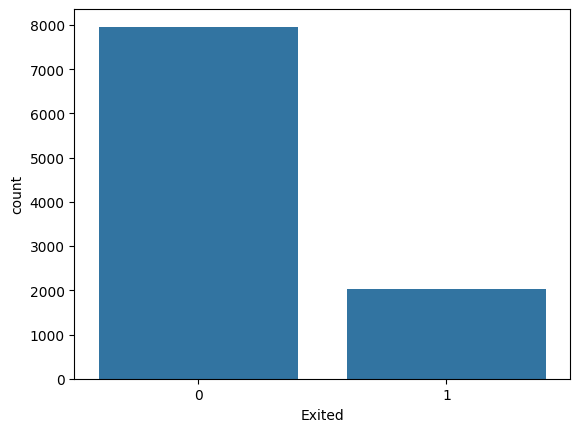

In [186]:
sns.countplot(x='Exited',data = df)

We can clearly see that the dataset is highly imbalanced.

In [187]:
df['Exited'].value_counts()

Exited
0    7962
1    2038
Name: count, dtype: int64



80% of the dataset has customers that did not cut ties with the company whereas, 20% left.
          **Churn Rate= (Number of customers who left /Total number of customers) * 100**


For this particular dataset the churn rate is **20%**
Having this value of churn rate especially in Banking/Finance industry is high and concerning.

Coming to the model,having a highly imbalanced dataset is not ideal to build a model. If we build a model on this dataset it may lead in underfitting of the minority class as the model do not have enough examples to learn patterns thereby leading to poor generalization.

Before balancing the dataset, let's convert the categorical values in the dataset to numeric values. By observing the dataset we can see that the features ["Geography","Gender","Card Type"] have categorical values 

In [188]:
cat_values = pd.DataFrame({
    'Geo': [df['Geography'].unique()],
    'Gender': [df['Gender'].unique()],
    'CType': [df['Card Type'].unique()]
})
cat_values

,Geo,Gender,CType
0,"[France, Spain, Germany]","[Female, Male]","[DIAMOND, GOLD, SILVER, PLATINUM]"


The features ["Gender","Geography"] have Nominal values. Nominal values are the values which have no numerical ordering among each other

In [189]:
df = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,False,False,True


The feature ["Card Type"] has Ordinal values . Ordinal values are the values which have numerical ordering between them, for instance in the feature Card Type having DIAMOND card is more valuable compared to Platinum which is in turn more valuable compared to GOLD followed by SILVER.

In [190]:
from sklearn.preprocessing import LabelEncoder

In [191]:
le = LabelEncoder()

In [192]:
df['Card Type']= le.fit_transform(df['Card Type'])
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,0,464,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,1,350,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425,False,False,True


In [193]:
X = df.drop('Exited',axis='columns')
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,2,0,464,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,1,3,0,456,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,1,3,0,377,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,5,1,350,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,5,1,425,False,False,True


In [194]:
Y = df['Exited']
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Let's split the data      





Also to balance the dataset, we are using SMOTE method.



SMOTE(Synthetic Minority Oversampling Technique) is a balancing technique which randomly selects the k nearest neighbors of the examples of minority class thereby increasing the number of examples belonging to the minority class

In [195]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [209]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
s = SMOTE(sampling_strategy = 'minority')
x_train_,y_train_ = s.fit_resample(x_train,y_train)


In [210]:
from sklearn.linear_model import LogisticRegression

In [211]:
model1 = LogisticRegression()

In [212]:
model1.fit(x_train_, y_train_)

C:\Users\satya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [213]:
pred1 = model1.predict(x_test)
pred1

array([1, 0, 0, ..., 0, 0, 0], shape=(3185,))

In [214]:
from sklearn.metrics import classification_report

In [215]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.51      0.50      0.50      1608
           1       0.50      0.50      0.50      1577

    accuracy                           0.50      3185
   macro avg       0.50      0.50      0.50      3185
weighted avg       0.50      0.50      0.50      3185



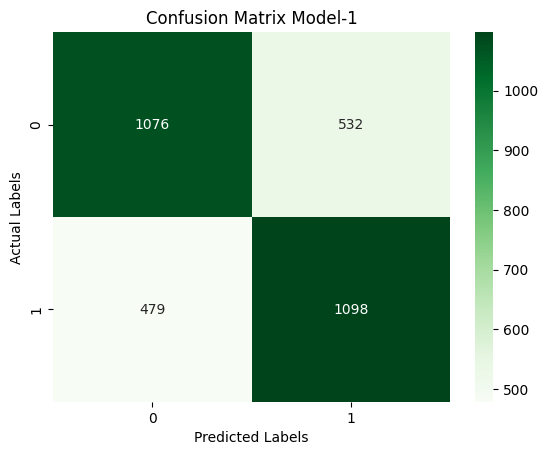

In [231]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, pred1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix Model-1')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

As seen this model is really bad at classifying. Therefore let's see another type of classifier which can have higher accuracy rate compared to Logistic Regression


Decision Tree Classifier

In [217]:
from sklearn.tree import DecisionTreeClassifier

In [218]:
model2 = DecisionTreeClassifier()

In [219]:
model2.fit(x_train_,y_train_)

DecisionTreeClassifier()

In [220]:
pred2 = model2.predict(x_test)
pred2

array([1, 0, 0, ..., 1, 0, 0], shape=(3185,))

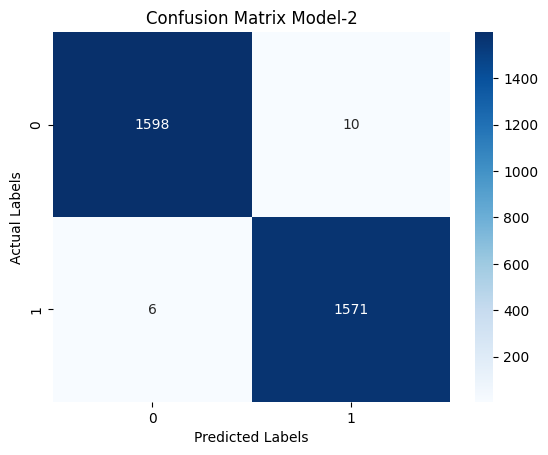

In [230]:
cm2 = confusion_matrix(y_test, pred2)
sns.heatmap(cm2,annot=True,fmt='d', cmap='Blues')
plt.title('Confusion Matrix Model-2')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.show()

This is a better model compared to the before one.